In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/output.csv')
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df = df.set_index('YEAR')



In [ ]:
df

,ANNUAL
YEAR,
1901-01-01,952.3
1902-01-01,1206.2
1903-01-01,1016.3
1904-01-01,1269.5
1905-01-01,1498.5
...,...
2011-01-01,1097.1
2012-01-01,1032.4
2013-01-01,1069.9


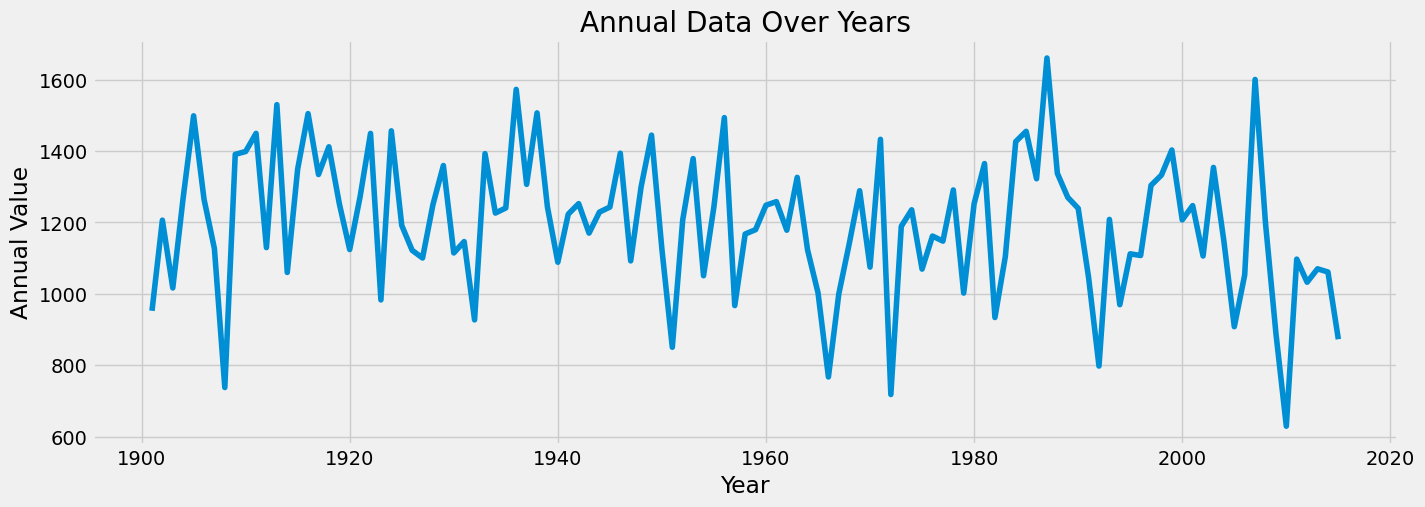

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size to be smaller, e.g., 8 inches by 6 inches
plt.figure(figsize=(15, 5))

# Assuming 'YEAR' is the x-axis and 'ANNUAL' is the y-axis
plt.plot(df.index, df['ANNUAL'])

# Adding title and labels
plt.title('Annual Data Over Years')
plt.xlabel('Year')
plt.ylabel('Annual Value')

# Display the plot
plt.show()


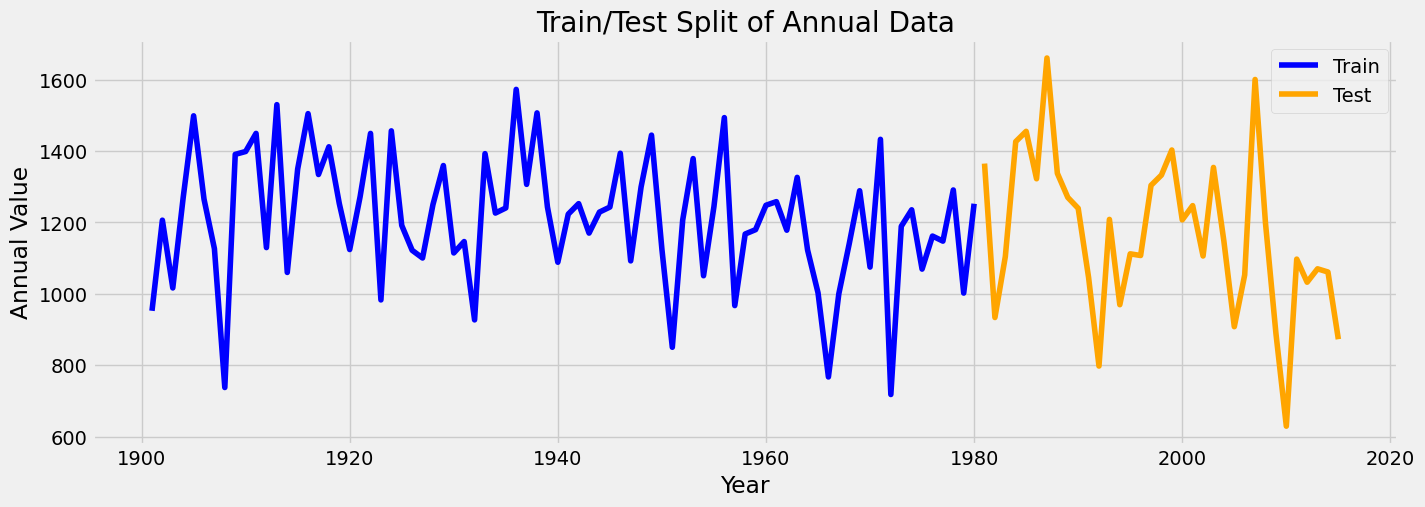

In [ ]:

# Determine the split point
split_point = int(len(df) * 0.7)
train, test = df[:split_point], df[split_point:]

# Plotting both the training and testing sets
plt.figure(figsize=(15, 5))
plt.plot(train.index, train['ANNUAL'], label='Train', color='blue')
plt.plot(test.index, test['ANNUAL'], label='Test', color='orange')

# Adding title and labels
plt.title('Train/Test Split of Annual Data')
plt.xlabel('Year')
plt.ylabel('Annual Value')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
import pandas as pd

def create_features(df):
    """
    Create time series features based on time series index.

    Parameters:
    df (DataFrame): A pandas DataFrame with a time series index.

    Returns:
    DataFrame: The original DataFrame with new time series features.
    """
    # Make sure the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DatetimeIndex.")

    # Create time series features
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    return df

# Example usage:
# Assuming 'df' is your DataFrame with a time series index
df = create_features(df)


In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['year','month','day','day_of_week','is_weekend']
TARGET = 'ANNUAL'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

<ipython-input-7-f136651f0294>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
<ipython-input-7-f136651f0294>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-7-f136651f0294>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:1211.84058	validation_1-rmse:1175.57778


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:38:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:478.81782	validation_1-rmse:468.88499
[200]	validation_0-rmse:227.68815	validation_1-rmse:282.23747
[300]	validation_0-rmse:148.66219	validation_1-rmse:234.94555
[400]	validation_0-rmse:125.43865	validation_1-rmse:225.76291
[500]	validation_0-rmse:115.49273	validation_1-rmse:223.76250
[587]	validation_0-rmse:108.94251	validation_1-rmse:223.88887


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Assuming you have your data loaded into X_train and y_train
# You may need to adapt this based on your specific data and task

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 3],
    'n_estimators': [50, 100, 200],
    'min_child_leaf': [1, 2, 3],  # Add values for min_child_leaf
    # Add other hyperparameters you want to tune
}

# Create an XGBoost regressor
xgb = XGBRegressor(base_score=0.75, booster='gblinear', n_jobs=-1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:38:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_leaf", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:38:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_leaf", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:38:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_leaf", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:38:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_leaf", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-p

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_leaf': 1, 'min_child_weight': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:39:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_leaf", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor with the specified hyperparameters
reg = XGBRegressor(base_score=0.5, booster='gbtree',
                   n_estimators=100,
                   objective='reg:squarederror',
                   max_depth=5,
                   learning_rate=0.1,
                   min_child_weight=3,
                   min_child_leaf=1)

# Fit the model to the training data
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


[0]	validation_0-rmse:1105.57109	validation_1-rmse:1070.05860
[99]	validation_0-rmse:68.70437	validation_1-rmse:232.43977


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:39:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_child_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_leaf=1, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

<ipython-input-12-cb3db7559da4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


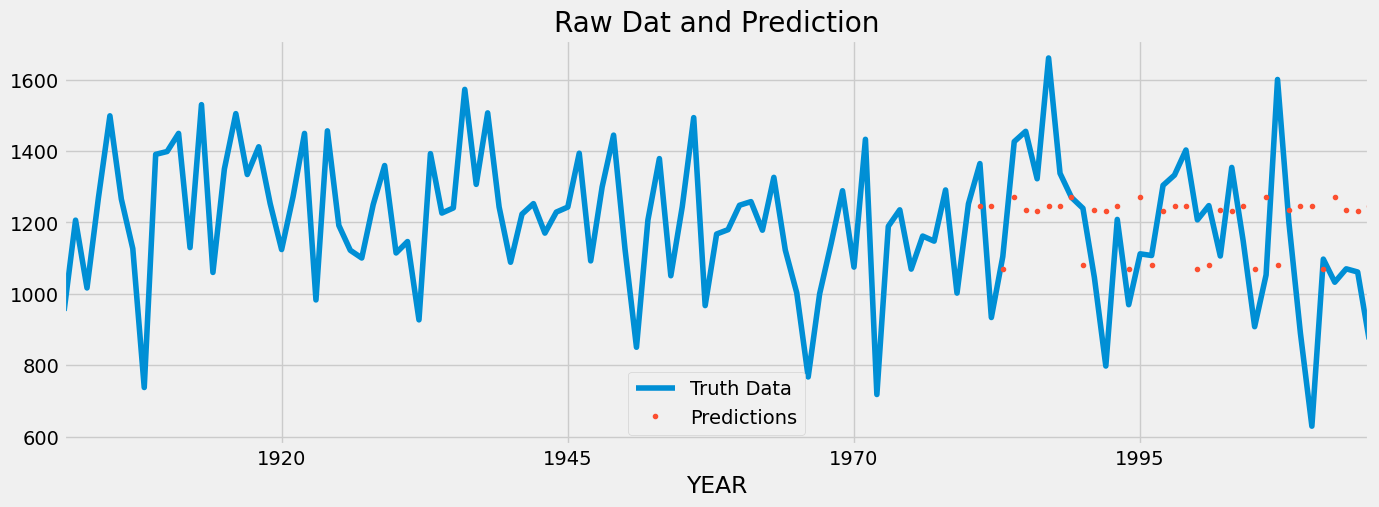

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['ANNUAL']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

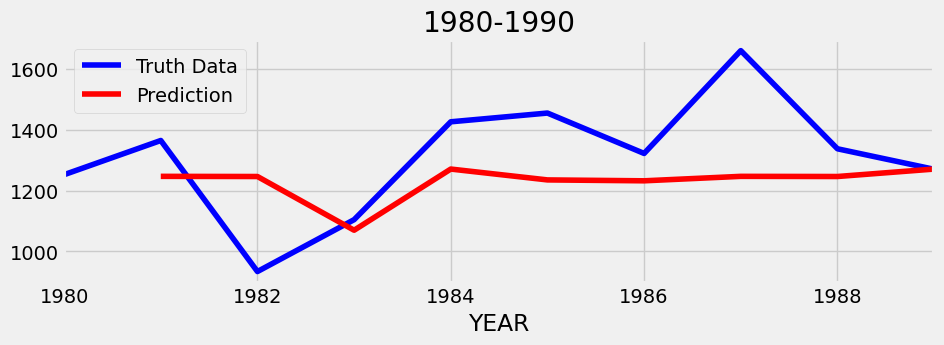

In [ ]:
import matplotlib.pyplot as plt

# Plot 'ANNUAL' data for 1980-1990 with a solid line
ax = df.loc[(df.index >= '1980') & (df.index < '1990')]['ANNUAL'] \
    .plot(figsize=(10, 3), title='1980-1990', label='Truth Data', color='blue', linestyle='-')

# Plot 'prediction' data for the same period with a solid line (assuming 'prediction' exists in the DataFrame)
df.loc[(df.index >= '1980') & (df.index < '1990')]['prediction'] \
    .plot(ax=ax, label='Prediction', color='red', linestyle='-')

# Add legend to distinguish between 'Truth Data' and 'Prediction'
plt.legend()

# Display the plot
plt.show()


In [ ]:
score = np.sqrt(mean_squared_error(test['ANNUAL'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 232.44


In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False)

<ipython-input-15-57d42c3b6a28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TARGET] - test['prediction'])
<ipython-input-15-57d42c3b6a28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


date
2010-01-01    616.987988
2007-01-01    518.737109
1992-01-01    434.446997
1987-01-01    413.686377
2015-01-01    374.013623
2009-01-01    357.413623
1982-01-01    312.687988
2012-01-01    238.304590
1985-01-01    220.015991
2006-01-01    217.904590
1991-01-01    189.284009
2014-01-01    171.046997
2001-01-01    165.537109
2013-01-01    165.084009
2005-01-01    161.639209
1995-01-01    158.804590
1990-01-01    157.937109
1999-01-01    156.512012
1984-01-01    155.495410
2000-01-01    137.560791
2002-01-01    129.184009
2003-01-01    121.853003
1981-01-01    117.986377
1994-01-01    100.039209
2004-01-01     98.913623
1988-01-01     91.212012
1986-01-01     90.053003
1998-01-01     85.786377
1997-01-01     71.653003
1993-01-01     37.887988
2008-01-01     37.284009
1983-01-01     34.760791
2011-01-01     27.660791
1996-01-01     25.737109
1989-01-01      0.804590
Name: error, dtype: float64

In [ ]:
import joblib

# Save the trained XGBoost model to a .pkl file
model_filename = 'xgboost_model.pkl'
joblib.dump(reg, model_filename)

# Optionally, you can also save the preprocessed data to be used for future predictions
data_filename = 'preprocessed_data.pkl'
preprocessed_data = {'train': train, 'test': test, 'features': FEATURES, 'target': TARGET}
joblib.dump(preprocessed_data, data_filename)

# Display a message indicating that the model and data have been saved
print(f'The XGBoost model has been saved as {model_filename}')
print(f'The preprocessed data has been saved as {data_filename}')


The XGBoost model has been saved as xgboost_model.pkl
The preprocessed data has been saved as preprocessed_data.pkl
